In [1]:
from __future__ import print_function
# key libs
import numpy as np
import re
import nltk
import pandas as pd
import glob
import codecs

# nlp libs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# processing
from sklearn.model_selection import train_test_split

# LDA
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF


# bring in my pickled vectorizers
import pickle
import dill


In [2]:
# what are we interestd in
# set this up to read the correct set of files we are interested in
topic_model = 'lda'
n_gram = '1gm' # options - 1gm , 2gm
stem_type = 'lemma' # options - lemma,snow

In [3]:
# set random state
RSEED = 0

### 1. OPEN - SENTIMENT ANALYSIS


In [4]:
sentiment_train=pd.read_csv('../data/sentiment_train.csv')
sentiment_test=pd.read_csv('../data/sentiment_test.csv')
sentiment_train = sentiment_train.drop(columns='Unnamed: 0')
sentiment_test = sentiment_test.drop(columns='Unnamed: 0')
sentiment_train.head()

,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,30101,2251,13.372279,0.093364,0.464357
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,56198,4427,12.694375,0.099922,0.490483
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,39627,3042,13.026627,0.109288,0.477824
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,18347,1373,13.362709,0.069424,0.507020
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,21181,1000,21.181000,0.071942,0.471564


In [5]:
sentiment_test.head()

,book_title,author_name,book_location,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,14056,1779,7.901068,0.046192,0.528086
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,50905,3621,14.058271,0.071414,0.487210
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,46998,4007,11.728974,0.082732,0.475208
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,8065,213,37.863850,0.148383,0.475731
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,118446,8497,13.939743,0.054021,0.492949


### 2. OPEN - TOPIC MODEL

In [6]:
# open pickled topic model pipeline
topic_pipe = dill.load(open('../data/vectors/'+ topic_model +'_'+ stem_type + '_' + n_gram,'rb'))

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
# load the train data
topic_train = pd.read_csv('../data/vectors/'+topic_model+'_'+ n_gram+'_'+ stem_type +'_train.csv')
topic_train = topic_train.drop(columns = 'Unnamed: 0')
topic_train.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,0.024503,0.000014,0.000014,0.019456,0.004147,0.000014,0.000014,0.188634,0.199965,0.000014,0.000014,0.000014,0.000014,0.289327,0.273858
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,0.122082,0.000007,0.303533,0.012188,0.000007,0.000007,0.013001,0.066539,0.122667,0.000007,0.000007,0.000007,0.123463,0.236478,0.000007
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,0.201496,0.087346,0.029985,0.027774,0.000010,0.022922,0.002199,0.137414,0.341142,0.018526,0.009753,0.052020,0.000010,0.068418,0.000984
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,0.000020,0.000020,0.007362,0.000020,0.000020,0.281786,0.000020,0.000020,0.264266,0.152951,0.000020,0.000020,0.086513,0.206946,0.000020
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,0.000020,0.069924,0.030690,0.036002,0.000020,0.000020,0.059825,0.018630,0.122308,0.000020,0.031033,0.000020,0.398182,0.003914,0.229392


In [8]:
# load the test data
topic_test = pd.read_csv('../data/vectors/'+topic_model+'_'+ n_gram+'_'+ stem_type +'_test.csv')
topic_test = topic_test.drop(columns = 'Unnamed: 0')
topic_test.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,0.101817,0.000024,0.000863,0.000024,0.000999,0.000024,0.000024,0.215072,0.055150,0.000024,0.089095,0.102721,0.218641,0.130368,0.085156
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,0.016490,0.108463,0.229974,0.000008,0.000008,0.157654,0.000008,0.000008,0.020388,0.000008,0.000008,0.000008,0.092946,0.374023,0.000008
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,0.113744,0.067719,0.177472,0.009760,0.000010,0.093262,0.000010,0.000010,0.007516,0.000010,0.136102,0.016032,0.003753,0.374590,0.000010
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,0.000050,0.000050,0.000050,0.238633,0.009119,0.000050,0.678779,0.072914,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,0.011050,0.000004,0.132279,0.000004,0.018823,0.000004,0.000004,0.015262,0.620572,0.000004,0.000004,0.000004,0.113574,0.056881,0.031530


### 3. JOIN ALL FEATURES
Join topic model features with sentiment analysis features.

In [9]:
print(topic_train.shape)
print(sentiment_train.shape)

(2428, 18)
(2428, 8)


In [10]:
feature_train = pd.merge(topic_train,sentiment_train, on='book_location', how='inner')
feature_test = pd.merge(topic_test,sentiment_test, on='book_location', how='inner')

In [11]:
# train
feature_train = feature_train.drop(columns =['book_title_y','author_name_y'])
feature_train.rename(columns={'book_title_x': 'book_title'}, inplace=True)
feature_train.rename(columns={'author_name_x': 'author_name'}, inplace=True)

# test
feature_test = feature_test.drop(columns =['book_title_y','author_name_y'])
feature_test.rename(columns={'book_title_x': 'book_title'}, inplace=True)
feature_test.rename(columns={'author_name_x': 'author_name'}, inplace=True)

Note : why minmaxscaler ->  because the topics are percentages and range from 0 to 1 not -1 to +1 

In [12]:
# normalize certain columns
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# log transform the counts 
column_names_to_log_1 = ['word_count', 'sentence_count', 'sentence_length']

feature_train.loc[:,column_names_to_log_1] = feature_train.loc[:,column_names_to_log_1].apply(np.log)
feature_test.loc[:,column_names_to_log_1] = feature_test.loc[:,column_names_to_log_1].apply(np.log)

# normalize subjectivity and polarity
column_names_to_normalize = ['subjectivity', 'polarity']

# train
x = feature_train[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = feature_train.index)
feature_train[column_names_to_normalize] = df_temp

# test
y = feature_test[column_names_to_normalize].values
y_scaled = min_max_scaler.transform(y)
df_temp = pd.DataFrame(y_scaled, columns=column_names_to_normalize, index = feature_test.index)
feature_test[column_names_to_normalize] = df_temp

In [13]:
feature_train.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,0.024503,0.000014,0.000014,0.019456,0.004147,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.289327,0.273858,10.312314,7.719130,2.593184,0.463344,0.438980
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,0.122082,0.000007,0.303533,0.012188,0.000007,0.000007,0.013001,...,0.000007,0.000007,0.123463,0.236478,0.000007,10.936636,8.395477,2.541159,0.481264,0.534175
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,0.201496,0.087346,0.029985,0.027774,0.000010,0.022922,0.002199,...,0.009753,0.052020,0.000010,0.068418,0.000984,10.587266,8.020270,2.566996,0.506857,0.488050
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,0.000020,0.000020,0.007362,0.000020,0.000020,0.281786,0.000020,...,0.000020,0.000020,0.086513,0.206946,0.000020,9.817221,7.224753,2.592468,0.397930,0.594432
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,0.000020,0.069924,0.030690,0.036002,0.000020,0.000020,0.059825,...,0.031033,0.000020,0.398182,0.003914,0.229392,9.960860,6.907755,3.053105,0.404810,0.465239


In [14]:
#log transform all topics
feature_train.loc[:,'topic_1':'topic_15'] = feature_train.loc[:,'topic_1':'topic_15'].apply(np.log)
feature_test.loc[:,'topic_1':'topic_15'] = feature_test.loc[:,'topic_1':'topic_15'].apply(np.log)

In [15]:
feature_train.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Behind the Beyond,Stephen Leacock,../data/gutenberg/Stephen Leacock___Behind the...,-3.708944,-11.188992,-11.188991,-3.939625,-5.485279,-11.188991,-11.188992,...,-11.188992,-11.188992,-11.188992,-1.240198,-1.295145,10.312314,7.719130,2.593184,0.463344,0.438980
1,Tommy and Co,Jerome Klapka Jerome,../data/gutenberg/Jerome Klapka Jerome___Tommy...,-2.103063,-11.877566,-1.192265,-4.407270,-11.877566,-11.877566,-4.342767,...,-11.877566,-11.877566,-2.091811,-1.441898,-11.877566,10.936636,8.395477,2.541159,0.481264,0.534175
2,Winsome Winnie and other New Nonsense Novels,Stephen Leacock,../data/gutenberg/Stephen Leacock___Winsome Wi...,-1.601984,-2.437873,-3.507049,-3.583657,-11.529485,-3.775675,-6.119833,...,-4.630175,-2.956126,-11.529485,-2.682115,-6.923869,10.587266,8.020270,2.566996,0.506857,0.488050
3,The Moccasin Ranch,Hamlin Garland,../data/gutenberg/Hamlin Garland___The Moccasi...,-10.836338,-10.836338,-4.911484,-10.836338,-10.836338,-1.266606,-10.836338,...,-10.836338,-10.836337,-2.447460,-1.575298,-10.836338,9.817221,7.224753,2.592468,0.397930,0.594432
4,Three Ghost Stories,Charles Dickens,../data/gutenberg/Charles Dickens___Three Ghos...,-10.808512,-2.660353,-3.483829,-3.324190,-10.808512,-10.808512,-2.816326,...,-3.472714,-10.808512,-0.920847,-5.543201,-1.472323,9.960860,6.907755,3.053105,0.404810,0.465239


In [16]:
feature_test.head()

,book_title,author_name,book_location,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Great Catherine,George Bernard Shaw,../data/gutenberg/George Bernard Shaw___Great ...,-2.284577,-10.653957,-7.055219,-10.653957,-6.908638,-10.653957,-10.653957,...,-2.418051,-2.275737,-1.520326,-2.037396,-2.463272,9.550805,7.483807,2.066998,0.334446,0.671189
1,Short Cruises,William Wymark Jacobs,../data/gutenberg/William Wymark Jacobs___Shor...,-4.105022,-2.221342,-1.469787,-11.776594,-11.776595,-1.847351,-11.776595,...,-11.776595,-11.776595,-2.375732,-0.983439,-11.776595,10.837716,8.194506,2.643211,0.403368,0.522250
2,Richard Dare's Venture,Edward Stratemeyer,../data/gutenberg/Edward Stratemeyer___Richard...,-2.173807,-2.692390,-1.728940,-4.629441,-11.503328,-2.372344,-11.503327,...,-1.994348,-4.133180,-5.585247,-0.981924,-11.503327,10.757860,8.295798,2.462062,0.434294,0.478516
3,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley,../data/gutenberg/Thomas Henry Huxley___Willia...,-9.894948,-9.894949,-9.894947,-1.432827,-4.697411,-9.894948,-0.387460,...,-9.894949,-9.894949,-9.894948,-9.894946,-9.894949,8.995289,5.361292,3.633997,0.613686,0.480421
4,Beyond,John Galsworthy,../data/gutenberg/John Galsworthy___Beyond.txt,-4.505308,-12.414485,-2.022839,-12.414486,-3.972688,-12.414486,-12.414485,...,-12.414485,-12.414485,-2.175302,-2.866790,-3.456817,11.682212,9.047468,2.634744,0.355840,0.543159


In [17]:
# write to file
feature_train.to_csv('../data/final_train.csv')
feature_test.to_csv('../data/final_test.csv')

In [18]:
dill.dump(min_max_scaler, open('../data/vectors/scaler','wb'))

### 4. CLUSTERING HARD

In [19]:
feature_train.describe()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,word_count,sentence_count,sentence_length,polarity,subjectivity
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000
mean,-7.515284,-7.863310,-7.787488,-6.803134,-7.311672,-7.764536,-7.552176,-6.788707,-6.388330,-7.615132,-7.319839,-7.904643,-7.187849,-7.311705,-7.165291,10.665799,7.677193,2.988606,0.467877,0.534923
std,4.360569,4.303607,4.487526,4.392550,4.461622,4.495727,4.040721,4.576672,4.722859,4.275120,4.449796,4.171678,4.566789,4.595419,4.426483,1.171656,1.214330,0.365530,0.094451,0.103872
min,-14.099337,-14.174688,-14.174689,-14.090363,-13.969135,-14.174689,-13.886590,-14.099336,-14.174689,-13.969135,-13.969135,-14.099336,-13.969134,-14.174689,-13.969135,5.634790,1.945910,1.703204,0.000000,0.000000
25%,-11.797603,-11.906770,-12.026570,-11.438293,-11.797603,-12.017283,-11.703150,-11.701320,-11.531093,-11.772697,-11.750739,-11.796050,-11.726500,-11.992869,-11.757950,10.010771,7.012114,2.761997,0.405117,0.476121
50%,-9.119866,-9.719712,-9.740672,-5.748470,-8.297923,-9.578047,-7.528274,-5.721320,-4.531200,-9.200283,-9.005157,-9.504865,-8.851720,-8.794076,-7.109794,10.966973,7.989729,2.993788,0.466642,0.540261
75%,-3.002599,-3.560928,-3.220935,-2.677285,-2.998162,-3.208217,-3.891137,-2.318468,-1.867064,-3.203793,-2.772100,-3.704202,-2.415929,-2.612652,-2.772779,11.500777,8.545245,3.218942,0.529624,0.596346
max,-0.062100,-0.048308,-0.000159,-0.001191,-0.000250,-0.000124,-0.000020,-0.026578,-0.131894,-0.130151,-0.025320,-0.081058,-0.019491,-0.069683,-0.153814,13.082641,10.327938,4.597774,1.000000,1.000000


In [20]:
X = feature_train.iloc[:,3:]

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
list_num_clusters = list(range(1,30))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

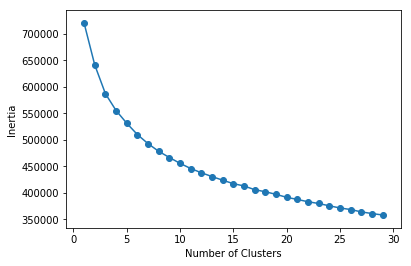

In [22]:
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

try clusters at 10 or 15/16

In [23]:
# from sklearn.cluster import KMeans
# num_clusters = 10
# km = KMeans(n_clusters=num_clusters)
# km.fit(X)
# #display_cluster(X,km,num_clusters)

In [24]:
# clustered = km.transform(X)

In [25]:
# km.cluster_centers_

Component's weights: 
 [[-0.24 -0.25 -0.25 -0.21 -0.23 -0.25 -0.24 -0.22 -0.21 -0.24 -0.23 -0.25
  -0.23 -0.24 -0.23  0.33  0.24  0.09  0.01  0.02]
 [ 0.14 -0.2  -0.34  0.45  0.25 -0.43  0.28  0.37 -0.19 -0.03  0.09 -0.01
  -0.01 -0.33  0.05 -0.   -0.02  0.02  0.    0.  ]]
Perc of Variance Explained: 
 [0.09 0.15]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

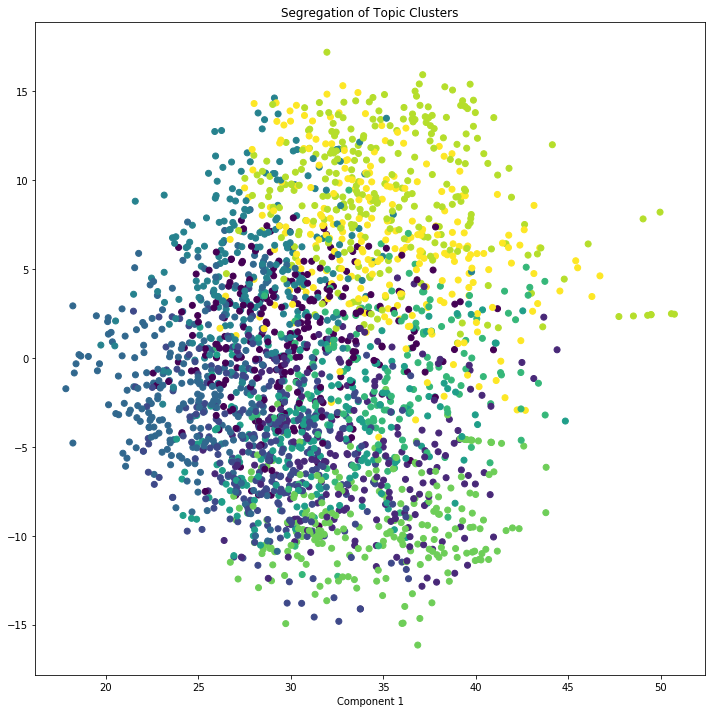

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
clusters = KMeans(n_clusters=10, random_state=RSEED).fit_predict(X)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(X)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )